1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


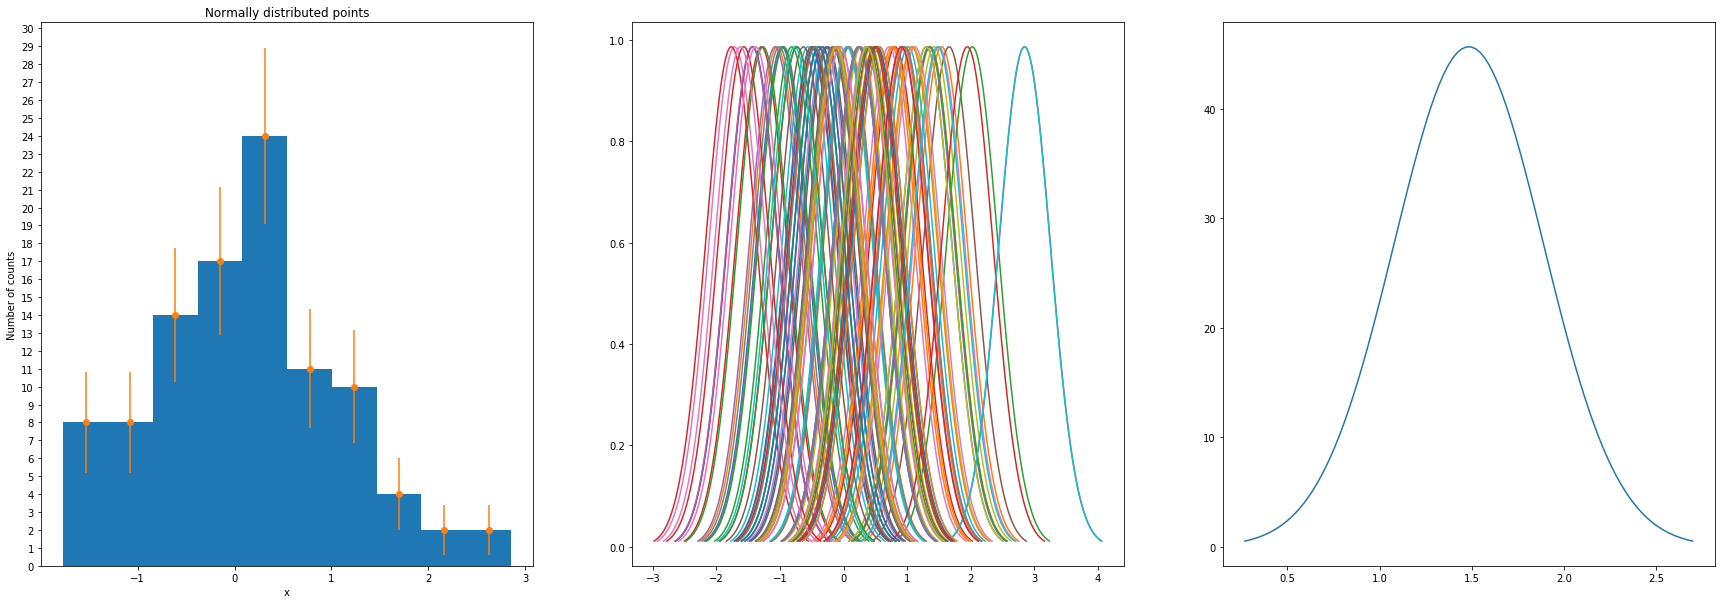

In [6]:
# Ex. 1.

import numpy as np
from scipy import stats
from scipy.integrate import trapz
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

mu, sigma, N = 0, 1, 100
x = np.random.normal(mu, sigma, N)

# Plot the histogram
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(30,10))
bins_numb = int(np.sqrt(x.shape[0]))
counts, bin_edges, _ = axes[0].hist(x, bins=bins_numb)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
bin_width = bin_edges[1] - bin_edges[0]
area = bin_width * sum(counts)
axes[0].errorbar(bin_centers, counts, yerr=np.sqrt(counts), fmt='o')
axes[0].yaxis.set_major_locator(MultipleLocator(1))
axes[0].set_title("Normally distributed points")
axes[0].set_xlabel("x")
axes[0].set_ylabel("Number of counts")

# Plot every gaussian 
sigma = 1.06*x.std()*(x.size**(-1/5))
g = []
for i in range(N):
    mu = x[i]
    x_new = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    g.append(stats.norm.pdf(x_new, mu, sigma))
    axes[1].plot(x_new, g[i])

# Sum all gaussian
g_summed = np.sum(g,axis=0)
normalization = trapz(g_summed,x_new)
normalized = g_summed*area/normalization
axes[2].plot(x_new,normalized)

plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

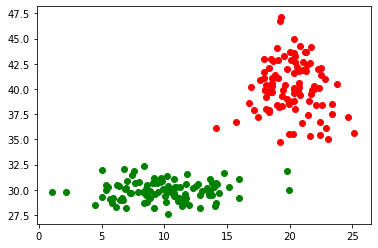

In [2]:
# Ex. 2.

c1x = np.random.normal(10,3,100)
c2x = np.random.normal(20,2,100)
c1y = np.random.normal(30,1,100)
c2y = np.random.normal(40,3,100)

plt.scatter(c1x,c1y, c = "green")
plt.scatter(c2x,c2y, c = "red")

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

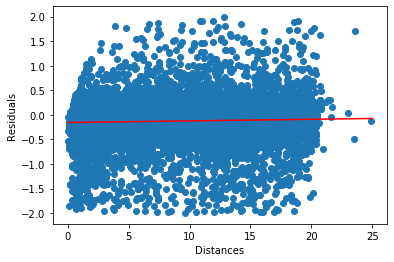

In [3]:
# Ex. 3.

import pandas as pd
import seaborn as sns

data = pd.DataFrame(np.load('residuals_261.npy',allow_pickle=True).item())
data = data[np.abs(data['residuals'])<2]

#___
slope, intercept, _, _, _ = stats.linregress(data['distances'],data['residuals'])
plt.scatter( data['distances'],data['residuals'])
plt.xlabel('Distances')
plt.ylabel('Residuals')
plt.plot(np.linspace(0,25,100), intercept+slope*np.linspace(0,25,100),color='r')

Text(27.125, 0.5, 'Residuals')

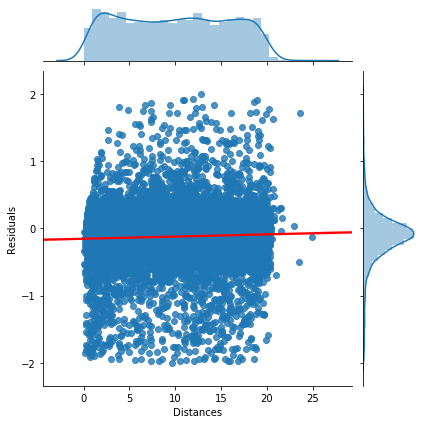

In [4]:
#___
sns.jointplot(x='distances', y='residuals', data = data, kind = 'reg', joint_kws={'line_kws':{'color':'red'}})
plt.xlabel('Distances')
plt.ylabel('Residuals')

No handles with labels found to put in legend.


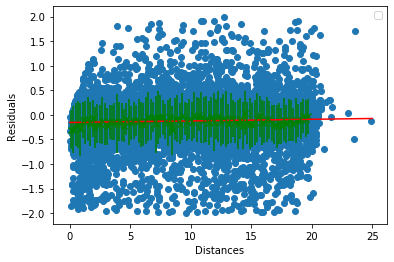

In [5]:
#___
x = np.arange(0,20, 20/100)
bins = (x[1:]+x[:-1])/2
y = [ np.array(data['residuals'][ (data['distances']< x[i+1]) & (data['distances']> x[i])  ]).mean() for i in range(len(x)-1)]
erry = [ np.array(data['residuals'][ (data['distances']< x[i+1]) & (data['distances']> x[i]) ]).std() for i in range(len(x)-1)]

fig, ax = plt.subplots()
ax.scatter(data['distances'],data['residuals'])
plt.plot(np.linspace(0,25,100), intercept+slope*np.linspace(0,25,100),color='red')
ax.scatter(bins,y,marker = 'x',color='green')
ax.errorbar(bins,y,erry,color='green')
ax.set_xlabel('Distances')
ax.set_ylabel('Residuals')
ax.legend()